# Reading Data

This uses the data format from [Create Parsed CSV](https://colab.research.google.com/drive/14ZGZdJ4xxM0ZAwCE2zGSm0SWC6H6nWXI#scrollTo=eKqSRKQgvq7a)

## Unzip File

In [ ]:
!unzip parsed_patient_data.zip

Archive:  parsed_patient_data.zip
  inflating: parsed_patient_data.csv  


## Read main file

In [ ]:
import pandas as pd

df = pd.read_csv("parsed_patient_data.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2440,2441,2442,2443,2444,2445,2446,2447,2448,2449
0,232.0,0.238632,0.238474,0.238414,0.238316,0.238085,0.237769,0.237522,0.237452,0.237516,...,0.012059,0.011989,0.011871,0.011729,0.011601,0.011492,0.011371,0.011241,0.011164,0.011170
1,59.0,0.216471,0.216397,0.216409,0.216444,0.216407,0.216261,0.216068,0.215938,0.215913,...,0.029054,0.029212,0.029524,0.029881,0.030134,0.030255,0.030323,0.030382,0.030409,0.030382
2,213.0,0.109393,0.109271,0.109190,0.109163,0.109112,0.108990,0.108815,0.108614,0.108422,...,0.011896,0.011860,0.011968,0.012149,0.012291,0.012355,0.012395,0.012476,0.012592,0.012688
3,189.0,0.099630,0.099845,0.100284,0.100685,0.100863,0.100841,0.100761,0.100721,0.100710,...,0.012581,0.012648,0.012809,0.012992,0.013140,0.013244,0.013323,0.013401,0.013489,0.013576
4,221.0,0.132230,0.132424,0.132705,0.132855,0.132772,0.132543,0.132363,0.132353,0.132458,...,0.017984,0.018097,0.018312,0.018425,0.018313,0.018070,0.017888,0.017860,0.017904,0.017846


# Parsing Features and Labels

In [ ]:
y = df["0"]
y.head()

0    232.0
1     59.0
2    213.0
3    189.0
4    221.0
Name: 0, dtype: float64

In [ ]:
X = df.drop("0", axis=1)
X.head()

,1,2,3,4,5,6,7,8,9,10,...,2440,2441,2442,2443,2444,2445,2446,2447,2448,2449
0,0.238632,0.238474,0.238414,0.238316,0.238085,0.237769,0.237522,0.237452,0.237516,0.237566,...,0.012059,0.011989,0.011871,0.011729,0.011601,0.011492,0.011371,0.011241,0.011164,0.011170
1,0.216471,0.216397,0.216409,0.216444,0.216407,0.216261,0.216068,0.215938,0.215913,0.215920,...,0.029054,0.029212,0.029524,0.029881,0.030134,0.030255,0.030323,0.030382,0.030409,0.030382
2,0.109393,0.109271,0.109190,0.109163,0.109112,0.108990,0.108815,0.108614,0.108422,0.108292,...,0.011896,0.011860,0.011968,0.012149,0.012291,0.012355,0.012395,0.012476,0.012592,0.012688
3,0.099630,0.099845,0.100284,0.100685,0.100863,0.100841,0.100761,0.100721,0.100710,0.100662,...,0.012581,0.012648,0.012809,0.012992,0.013140,0.013244,0.013323,0.013401,0.013489,0.013576
4,0.132230,0.132424,0.132705,0.132855,0.132772,0.132543,0.132363,0.132353,0.132458,0.132511,...,0.017984,0.018097,0.018312,0.018425,0.018313,0.018070,0.017888,0.017860,0.017904,0.017846


## Visualize Data

36.0


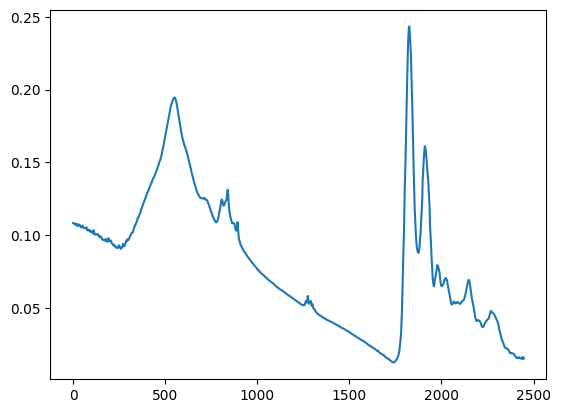

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

def visualize(index):
  print(y[index])
  plt.plot(X.loc[index].tolist())

visualize(7)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(model):
    df_sorted = df.sort_values(by="0")

    y_sorted = df_sorted["0"]
    X_sorted = df_sorted.drop("0", axis=1)

    predictions = model.predict(X_sorted)

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(y_sorted.array, label='Actual')
    ax.plot(predictions, label='Predicted')

    ax.set_xlabel('Index')
    ax.set_ylabel('Value')
    ax.set_title('Actual vs Predicted')
    ax.legend()

    ax.grid(True)

    plt.show()

In [ ]:
y_array = y.array
y_avg = sum(y_array) / len(y_array)
print(y_avg)
preds = []

for item in y_array:
  preds.append(abs(item - y_avg))

sum(preds) / len(preds)

146.0902934537246


44.56591371166219

## Create `X` and `y` from Data

### Import Tensorflow

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

## Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.head()

,1,2,3,4,5,6,7,8,9,10,...,2440,2441,2442,2443,2444,2445,2446,2447,2448,2449
58,0.100689,0.100565,0.100373,0.100297,0.100392,0.100521,0.100536,0.100433,0.100306,0.100230,...,0.010183,0.010150,0.010184,0.010292,0.010423,0.010521,0.010567,0.010566,0.010528,0.010483
19,0.116362,0.116102,0.115872,0.115698,0.115700,0.115908,0.116142,0.116168,0.115948,0.115679,...,0.000791,0.000779,0.000741,0.000651,0.000574,0.000556,0.000523,0.000402,0.000255,0.000232
40,0.175242,0.175505,0.175512,0.175174,0.174743,0.174492,0.174417,0.174364,0.174328,0.174450,...,0.011860,0.011869,0.012026,0.012266,0.012524,0.012763,0.012965,0.013147,0.013323,0.013445
141,0.227711,0.227713,0.227678,0.227708,0.227755,0.227644,0.227318,0.226949,0.226758,0.226795,...,0.095787,0.096044,0.096198,0.096328,0.096565,0.096967,0.097438,0.097818,0.098030,0.098102
306,0.183637,0.183598,0.183747,0.183973,0.184095,0.184052,0.183972,0.184019,0.184155,0.184140,...,0.016248,0.016382,0.016523,0.016687,0.016870,0.017042,0.017148,0.017144,0.017059,0.017010


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler = scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import pickle

with open("min_max_scaler.pkl", "wb") as file:
  pickle.dump(scaler, file)

# with open("min_max_scaler.pkl", "rb") as file:
#   loaded_scaler = pickle.load(file)

## Convert to Tensors

In [ ]:
X_train = tf.constant(X_train, dtype=tf.float32)
X_test = tf.constant(X_test, dtype=tf.float32)
y_train = tf.constant(y_train, dtype=tf.float32)
y_test = tf.constant(y_test, dtype=tf.float32)

# Creating Model

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
tf.random.set_seed(50)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

history_1 = model_1.fit(X_train_norm, y_train, epochs=100)

3/3 [==============================] - 0s 4ms/step - loss: 50.7638 - mae: 50.7638


[50.763797760009766, 50.763797760009766]

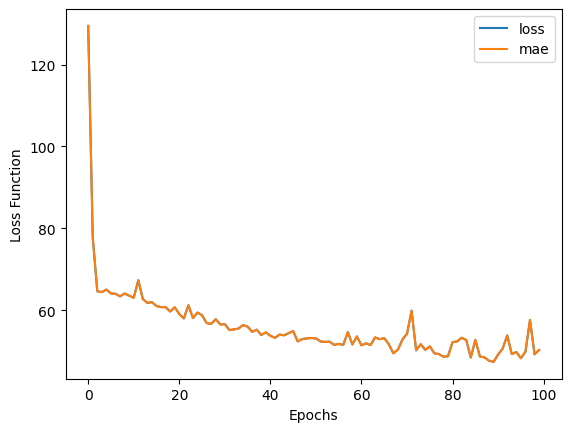

In [ ]:
pd.DataFrame(history_1.history).plot()
plt.ylabel("Loss Function")
plt.xlabel("Epochs")
model_1.evaluate(X_test_norm, y_test)

# Installing TensorflowJS

We need this for when we save models

In [ ]:
!pip install tensorflowjs

# Mass Model Creation

## Model 2 - Adam

In [ ]:
tf.random.set_seed(50)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])
history_2 = model_2.fit(X_train_norm,
                        y_train,
                        epochs=100)

3/3 [==============================] - 0s 4ms/step - loss: 46.5660 - mae: 46.5660


[46.566043853759766, 46.566043853759766]

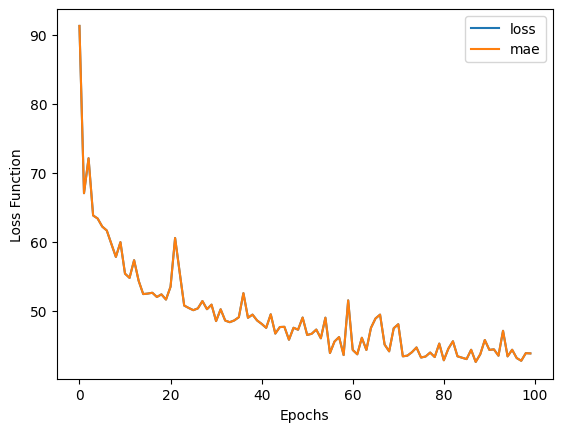

In [ ]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("Loss Function")
plt.xlabel("Epochs")
model_2.evaluate(X_test_norm, y_test)

## Model 3 - MSE

In [ ]:
tf.random.set_seed(50)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss='mse',
                optimizer='adam',
                metrics=['mae'])

history_3 = model_3.fit(X_train_norm, y_train, epochs=100)

Epoch 1/100
12/12 [==============================] - 7s 9ms/step - loss: 12268.1172 - mae: 88.0549
Epoch 2/100
12/12 [==============================] - 0s 10ms/step - loss: 8260.2051 - mae: 66.8752
Epoch 3/100
12/12 [==============================] - 0s 10ms/step - loss: 7201.9683 - mae: 69.3086
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 7171.0850 - mae: 64.6547
Epoch 5/100
12/12 [==============================] - 0s 16ms/step - loss: 6952.5269 - mae: 67.9217
Epoch 6/100
12/12 [==============================] - 0s 14ms/step - loss: 6918.4302 - mae: 65.7252
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 6794.9019 - mae: 64.5389
Epoch 8/100
12/12 [==============================] - 0s 9ms/step - loss: 7042.8618 - mae: 68.9370
Epoch 9/100
12/12 [==============================] - 0s 9ms/step - loss: 7200.8403 - mae: 62.9269
Epoch 10/100
12/12 [==============================] - 0s 10ms/step - loss: 6667.8862 - mae: 66.3130
Epoch 11/100


3/3 [==============================] - 0s 8ms/step - loss: 2686.1289 - mae: 42.4843


[2686.12890625, 42.48432540893555]

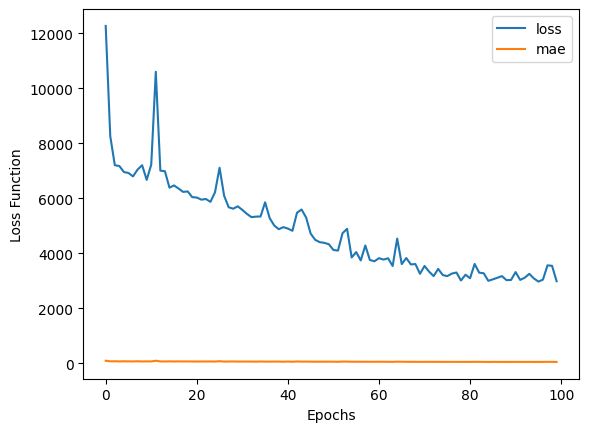

In [ ]:
pd.DataFrame(history_3.history).plot()
plt.ylabel("Loss Function")
plt.xlabel("Epochs")
model_3.evaluate(X_test_norm, y_test)

## Visualizations

In [ ]:
import random

plt.figure(figsize=(10, 10))

for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(X_train_norm)))
  plt.plot(X_train_norm[rand_index])
  plt.title(y_train.tolist()[rand_index])
  plt.axis(False)

## Model 4 - BatchNormalization

Since normalization with `tensorflow.js` might be hard, we'll just build it into the model

In [ ]:
# normalized data vs regular data
X_train_norm[0][:5], X_train.numpy()[0][:5]

(array([0.1822834 , 0.18333011, 0.18407128, 0.1841748 , 0.18389359]),
 array([0.10536254, 0.10536756, 0.105239  , 0.10502245, 0.10490365],
       dtype=float32))

In [ ]:
tf.random.set_seed(50)

model_4 = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss='mse',
                optimizer='adam',
                metrics=['mae'])

history_4 = model_4.fit(X_train, y_train, epochs=25)

Epoch 1/25
12/12 [==============================] - 3s 7ms/step - loss: 25363.3242 - mae: 145.8651
Epoch 2/25
12/12 [==============================] - 0s 4ms/step - loss: 23869.5273 - mae: 143.3322
Epoch 3/25
12/12 [==============================] - 0s 4ms/step - loss: 22835.9883 - mae: 141.4123
Epoch 4/25
12/12 [==============================] - 0s 4ms/step - loss: 21746.3184 - mae: 137.2164
Epoch 5/25
12/12 [==============================] - 0s 4ms/step - loss: 18480.3398 - mae: 125.0111
Epoch 6/25
12/12 [==============================] - 0s 4ms/step - loss: 10920.0264 - mae: 92.4079
Epoch 7/25
12/12 [==============================] - 0s 4ms/step - loss: 3464.4111 - mae: 49.5337
Epoch 8/25
12/12 [==============================] - 0s 4ms/step - loss: 3476.2468 - mae: 44.5414
Epoch 9/25
12/12 [==============================] - 0s 4ms/step - loss: 2961.6670 - mae: 46.9365
Epoch 10/25
12/12 [==============================] - 0s 4ms/step - loss: 2979.0872 - mae: 46.1319
Epoch 11/25
12/12 

3/3 [==============================] - 0s 9ms/step - loss: 2961.6602 - mae: 47.1540


[2961.66015625, 47.15397262573242]

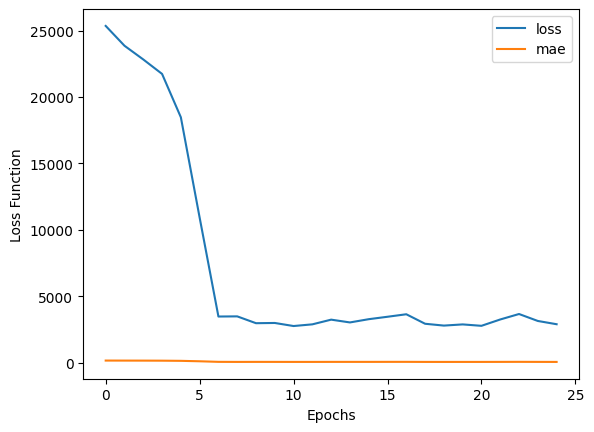

In [ ]:
pd.DataFrame(history_4.history).plot()
plt.ylabel("Loss Function")
plt.xlabel("Epochs")
model_4.evaluate(X_test, y_test)

### Make Predictions with Model

In [ ]:
predictions = model_4.predict(X)

14/14 [==============================] - 0s 4ms/step


In [ ]:
print(f"Min: {predictions.min()}")
print(f"Max: {predictions.max()}")
print(f"Mean: {predictions.mean()}")

Min: 118.84898376464844
Max: 163.22265625
Mean: 148.08920288085938


In [ ]:
model_4.evaluate(X)

14/14 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - mae: 0.0000e+00


[0.0, 0.0]

In [ ]:
print(f"Min: {tf.reduce_min(y_train).numpy()}")
print(f"Max: {tf.reduce_max(y_train).numpy()}")
print(f"Mean: {tf.reduce_mean(y_train).numpy()}")

Min: 7.0
Max: 232.0
Mean: 146.940673828125


### Saving Model

In [ ]:
model_4.save("model_4.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!tensorflowjs_converter --input_format keras model_4.h5 model_4

2024-03-02 06:36:34.759888: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-02 06:36:34.759975: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-02 06:36:34.761519: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-02 06:36:37.007747: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
!zip -r model_4.zip model_4/

  adding: model_4/ (stored 0%)
  adding: model_4/model.json (deflated 76%)
  adding: model_4/group1-shard2of3.bin (deflated 7%)
  adding: model_4/group1-shard1of3.bin (deflated 7%)
  adding: model_4/group1-shard3of3.bin (deflated 7%)


In [ ]:
from google.colab import files
files.download("model_4.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

14/14 [==============================] - 0s 3ms/step


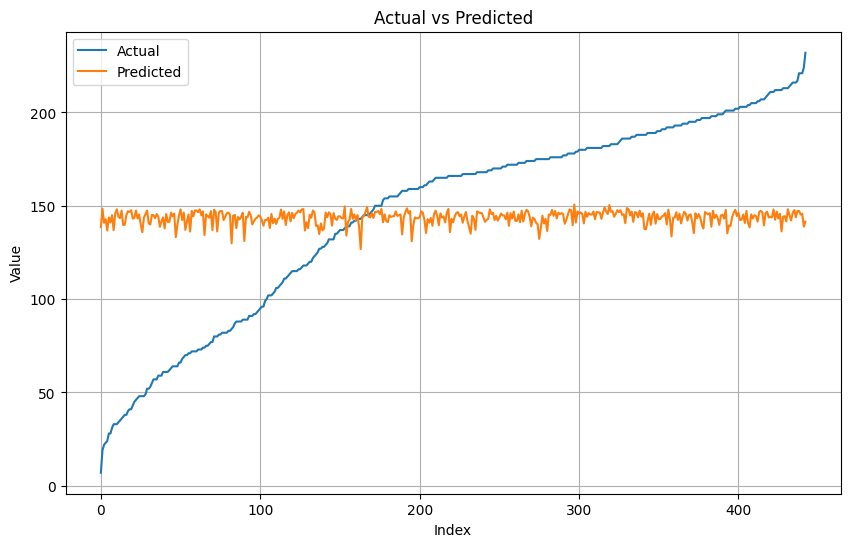

In [ ]:
plot_actual_vs_predicted(model_4)

## Model 5 - CNN

In [ ]:
tf.random.set_seed(50)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(2449, 1)),
    tf.keras.layers.MaxPool1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model_5.compile(loss='mse',
                optimizer='adam',
                metrics=['mae'])

history_5 = model_5.fit(X_train, y_train, epochs=100)

3/3 [==============================] - 0s 109ms/step - loss: 3062.6853 - mae: 48.6742


[3062.685302734375, 48.67416000366211]

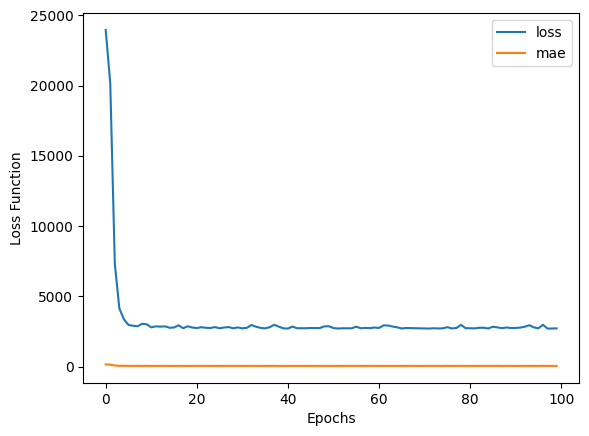

In [ ]:
pd.DataFrame(history_5.history).plot()
plt.ylabel("Loss Function")
plt.xlabel("Epochs")
model_5.evaluate(X_test, y_test)

## Model 6 -- CNN and Normalization

In [ ]:
tf.random.set_seed(50)

model_6 = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=(2449, 1)),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

model_6.compile(loss='mse',
                optimizer='adam',
                metrics=['mae'])

history_6 = model_6.fit(X_train, y_train, epochs=100)

3/3 [==============================] - 1s 264ms/step - loss: 3071.6348 - mae: 48.3710


[3071.634765625, 48.37095260620117]

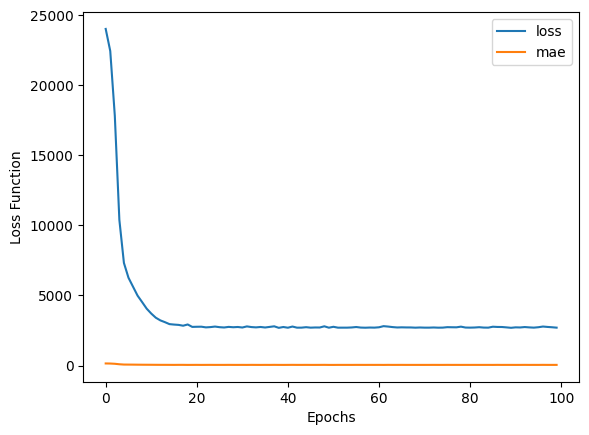

In [ ]:
pd.DataFrame(history_6.history).plot()
plt.ylabel("Loss Function")
plt.xlabel("Epochs")
model_6.evaluate(X_test, y_test)

## Model 7 - Lots of Convolution

In [ ]:
tf.random.set_seed(50)

model_7 = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=(2449, 1)),
    tf.keras.layers.Conv1D(filters=256, kernel_size=10, activation='relu'),
    tf.keras.layers.Conv1D(filters=32, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=10),
    tf.keras.layers.Conv1D(filters=32, kernel_size=10, activation='relu'),
    tf.keras.layers.Conv1D(filters=32, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=10),
    tf.keras.layers.Dense(1, activation='relu')
])

model_7.compile(loss='mse',
                optimizer='adam',
                metrics=['mae'])

history_7 = model_7.fit(X_train, y_train, epochs=100)
model_7.evaluate(X_test, y_test)

## Model 8 - More Layers

In [ ]:
X_train.shape

TensorShape([354, 2449])

In [ ]:
tf.random.set_seed(50)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(2449, activation='relu'),
    tf.keras.layers.Dense(2449, activation='relu'),
    tf.keras.layers.Dense(2449, activation='relu'),
    tf.keras.layers.Dense(2449, activation='relu'),
    tf.keras.layers.Dense(2449, activation='relu'),
    tf.keras.layers.Dense(2449, activation='relu'),
    tf.keras.layers.Dense(2449, activation='relu'),
    tf.keras.layers.Dense(2449, activation='relu'),
    tf.keras.layers.Dense(2449, activation='relu'),
    tf.keras.layers.Dense(2449, activation='relu'),
    tf.keras.layers.Dense(1250, activation='relu'),
    tf.keras.layers.Dense(625, activation='relu'),
    tf.keras.layers.Dense(312, activation='relu'),
    tf.keras.layers.Dense(156, activation='relu'),
    tf.keras.layers.Dense(78, activation='relu'),
    tf.keras.layers.Dense(39, activation='relu'),
    tf.keras.layers.Dense(19, activation='relu'),
    tf.keras.layers.Dense(9, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_8.compile(loss='mse',
                optimizer='adam',
                metrics=['mae'])

history_8 = model_8.fit(X_train, y_train, epochs=100)
model_8.evaluate(X_test, y_test)

## Model 9 - Bishal Tricks

Mine did not work as well as his. Not sure why yet.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout

tf.random.set_seed(50)

model_9 = tf.keras.Sequential([
    BatchNormalization(),
    Dense(1000, activation="relu"),
    Dropout(0.2),
    Dense(100, activation="relu"),
    Dropout(0.1),
    Dense(1)
])

model_9.compile(loss="mse",
                optimizer="adam",
                metrics=["mae"])

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

history_9 = model_9.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), callbacks=[lr_scheduler, early_stopping])
model_9.evaluate(X_test, y_test)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_9)
tflite_model = converter.convert()

In [ ]:
with open("model9.tflite", "wb") as f:
    f.write(tflite_model)

# More Mass Models - Experiment with these next few more

- Play with model structure
- Mess with hyperparameters

## Model 10 - Dense With Dropout

- Adding batch normalization improved this one a lot

In [ ]:
import tensorflow as tf
tf.random.set_seed(50)

model_10 = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=(2449,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

model_10.compile(loss="mae",
                 optimizer="adam",
                 metrics=["mse"])

history_10 = model_10.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

## Model 11 - Long Short Term Memory

This one was still learning after 100 epochs, try adjusting the learning rate/epochs

In [ ]:
import tensorflow as tf
tf.random.set_seed(50)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Reshape((2449, 1), input_shape=(2449,)),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1)
])

model_11.compile(loss="mae",
                 optimizer="adam",
                 metrics=["mse"])

history_11 = model_11.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

## Model 12 - Bidirectional LSTM

- Was still learning

In [ ]:
import tensorflow as tf

tf.random.set_seed(50)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Reshape((2449, 1), input_shape=(2449,)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(1)
])

# Define the initial learning rate
initial_learning_rate = 0.1

# Create an Adam optimizer with the initial learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)

model_12.compile(loss="mae", optimizer=optimizer, metrics=["mse"])

# Define the ReduceLROnPlateau callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',  # Monitor the validation loss
    factor=0.5,          # Reduce the learning rate by a factor of 0.5
    patience=5,          # Wait for 5 epochs with no improvement before reducing the learning rate
    min_lr=1e-5,         # Set a minimum learning rate
    verbose=1            # Print information when the learning rate is reduced
)

# Train the model with the ReduceLROnPlateau callback
history_12 = model_12.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[reduce_lr])

Text(0.5, 0, 'Epochs')

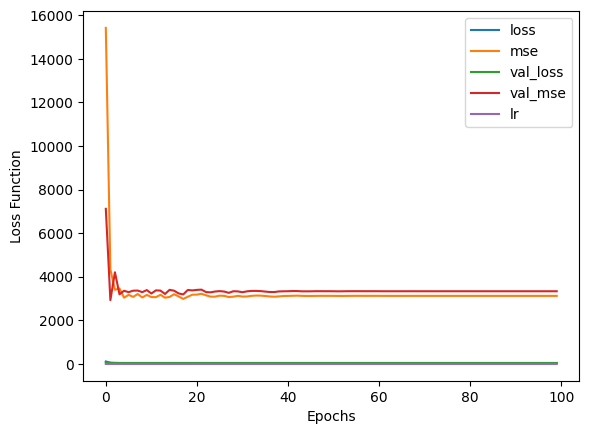

In [ ]:
pd.DataFrame(history_12.history).plot()
plt.ylabel("Loss Function")
plt.xlabel("Epochs")

## Model 13 - Cated Recurrent Unit

In [ ]:
import tensorflow as tf
tf.random.set_seed(50)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Reshape((2449, 1), input_shape=(2449,)),
    tf.keras.layers.GRU(64),
    tf.keras.layers.Dense(1)
])

model_13.compile(loss="mae",
                 optimizer="adam",
                 metrics=["mse"])

history_13 = model_13.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

## Model 14 - CNN-LSTM

In [ ]:
import tensorflow as tf
tf.random.set_seed(50)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Reshape((2449, 1), input_shape=(2449,)),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1)
])

model_14.compile(loss="mae",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                 metrics=["mse"])

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-5,
    verbose=1
)

history_14 = model_13.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[reduce_lr])

## Model 15 - Deep and Wide Model

In [ ]:
import tensorflow as tf
tf.random.set_seed(50)

input_layer = tf.keras.layers.Input(shape=(2449,))
wide = tf.keras.layers.Dense(64, activation='relu')(input_layer)
deep = tf.keras.layers.Dense(128, activation='relu')(input_layer)
deep = tf.keras.layers.Dense(64, activation='relu')(deep)
merged = tf.keras.layers.concatenate([wide, deep])
output_layer = tf.keras.layers.Dense(1)(merged)
model_15 = tf.keras.Model(inputs=input_layer, outputs=output_layer)

model_15.compile(loss="mae",
                 optimizer="adam",
                 metrics=["mse"])

history_15 = model_15.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

14/14 [==============================] - 0s 5ms/step


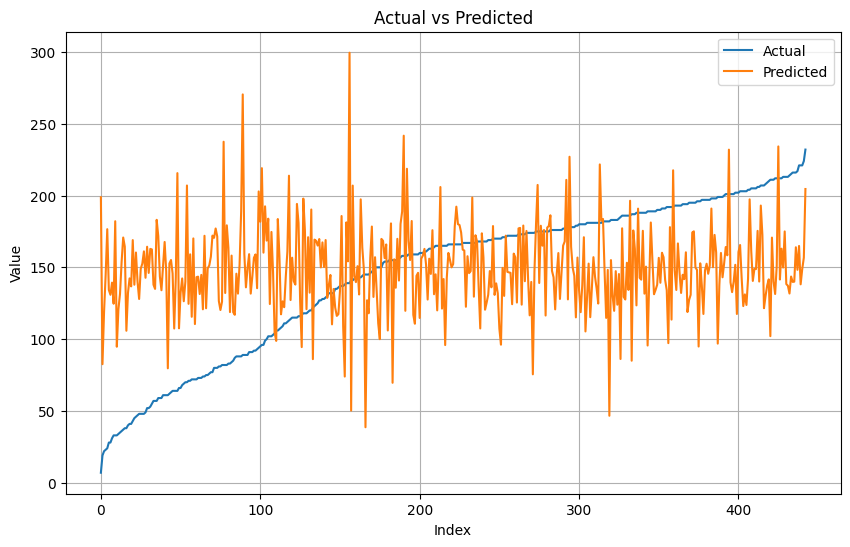

In [ ]:
plot_actual_vs_predicted(model_15)

## Model 16 - Attention is All you Need

*Attention is, in fact, not all you need*

In [ ]:
import tensorflow as tf
tf.random.set_seed(50)

inputs = tf.keras.layers.Input(shape=(2449,))
x = tf.keras.layers.Reshape((2449, 1))(inputs)
x = tf.keras.layers.Conv1D(64, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling1D(2)(x)
x = tf.keras.layers.LSTM(64, return_sequences=True)(x)
x = tf.keras.layers.Attention()([x, x])
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(1)(x)
model_16 = tf.keras.Model(inputs=inputs, outputs=outputs)

model_16.compile(loss="mae",
                 optimizer="adam",
                 metrics=["mse"])

history_16 = model_16.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

14/14 [==============================] - 1s 46ms/step


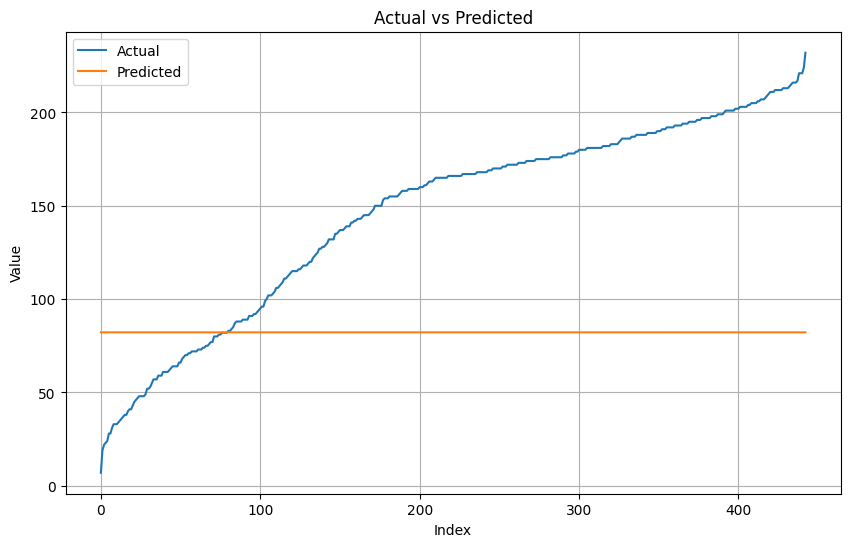

In [ ]:
plot_actual_vs_predicted(model_16)

## Model 17 - Literally the one Bishal Made

In [ ]:
import tensorflow as tf
tf.random.set_seed(50)

model_17 = tf.keras.models.load_model("improve_accuracy2.h5")

14/14 [==============================] - 0s 3ms/step


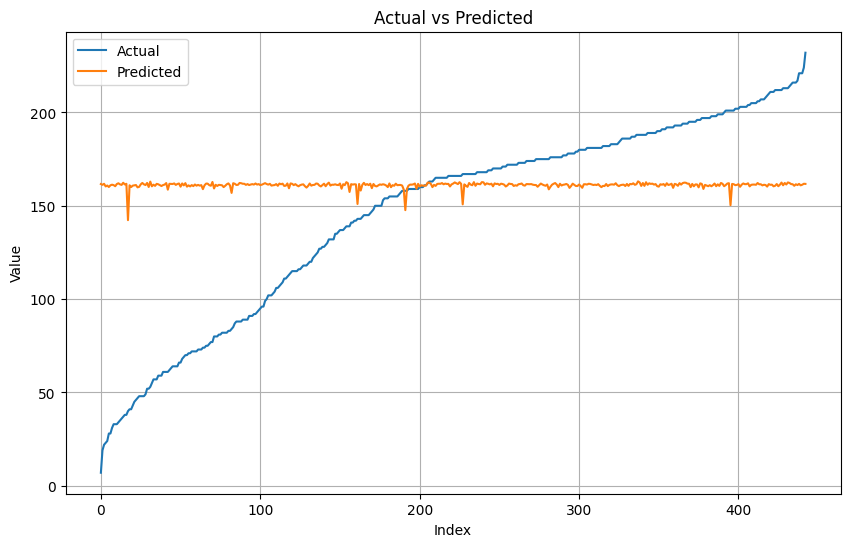

In [ ]:
plot_actual_vs_predicted(model_17)

In [ ]:
model_17.evaluate(X_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 43.6357 - mae: 43.6357


[43.635658264160156, 43.635658264160156]